# Problem Statement

The aim to build predictive model and predict the sales of each product at a particular outlet

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the data
train=pd.read_csv("/home/luminar/train.csv")
test=pd.read_csv("/home/luminar/test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
#shape of training and testing data
train.shape,test.shape

((8523, 12), (5681, 11))

There are 12 columns in train dataset, whereas 11 in the test dataset. The missing column in the test dataset is the target variable and we will train our model to predict that variable.


# Data Preprocessing

In [6]:
#TO COMBINE TRAIN AND TEST DATA AND PROVIDE A INDEX TO IDENTIFY THE TRAIN AND TEST DATA SEPARATELY
train['Index']='train'
test['Index']='test'
data=pd.concat([train,test],ignore_index=True)

In [7]:
# printing the first 5 rows
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Index
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [8]:
# datatypes of the columns
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Index                         object
dtype: object

In [9]:
# To find max,min,mean,count,quartiles of numerical variables
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
# To find correlation between variables
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


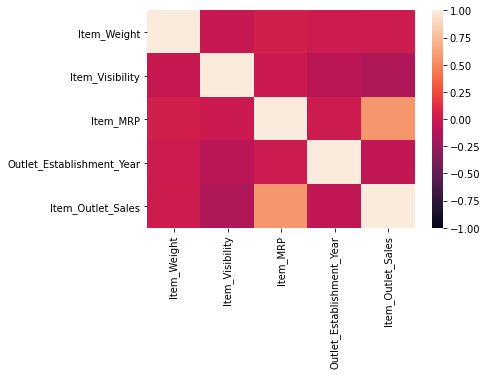

In [11]:
sns.heatmap(data.corr(),vmax=1,vmin=-1)

We can infer that item_MRP is positively correlated with target variable.As list price of item is more, the sale of item in outlet is more

# Univariate Analysis

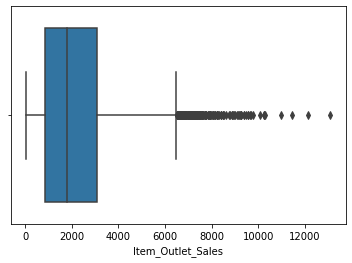

In [12]:
#Boxplot
sns.boxplot(data['Item_Outlet_Sales'])

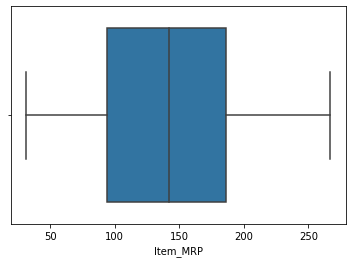

In [13]:
sns.boxplot(data['Item_MRP'])

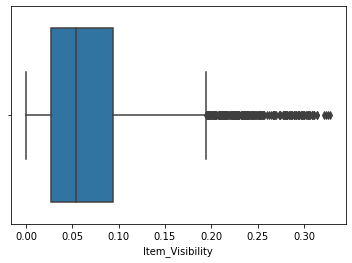

In [14]:
sns.boxplot(data['Item_Visibility'])

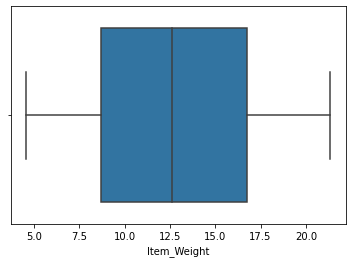

In [15]:
sns.boxplot(data['Item_Weight'])

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

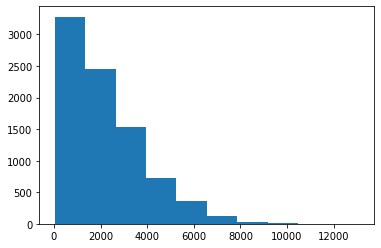

In [18]:
#Distribution of target variable
plt.hist(data['Item_Outlet_Sales'])

The distribution is skewed towards right

In [19]:
#REPLACING THE ITEM VISIBILITY WHICH HAS THE VALUE 0 WITH ITS MEAN VALUE 

data['Item_Visibility'][data['Item_Visibility']==0] = data['Item_Visibility'].mean()

In [20]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017913,0.036236,0.000645,0.014123
Item_Visibility,-0.017913,1.000000,-0.008790,-0.088598,-0.134141
Item_MRP,0.036236,-0.008790,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.088598,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.134141,0.567574,-0.049135,1.000000


In [21]:
#Unique variables
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [22]:
# mapping item_fat_content to LowFat and Regular 
data['Item_Fat_Content']=data['Item_Fat_Content'].map({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular','Low Fat':'Low Fat','Regular':'Regular'})

In [23]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

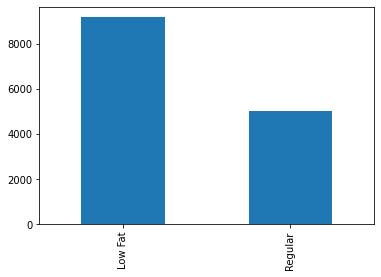

In [24]:
#Bar plot
data['Item_Fat_Content'].value_counts().plot.bar()

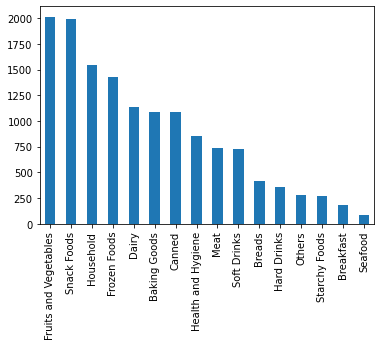

In [25]:
data['Item_Type'].value_counts().plot.bar()

We can see that most of the item types are fruits and vegetables and seafood items are least.

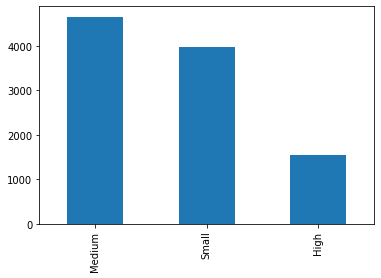

In [26]:
data['Outlet_Size'].value_counts().plot.bar()

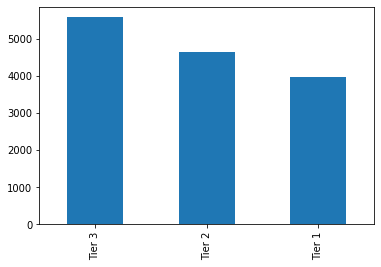

In [27]:
data['Outlet_Location_Type'].value_counts().plot.bar()

# Bivariate Analysis

In [28]:
fat=data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()
fat

Item_Fat_Content
Low Fat    2157.711534
Regular    2224.561170
Name: Item_Outlet_Sales, dtype: float64

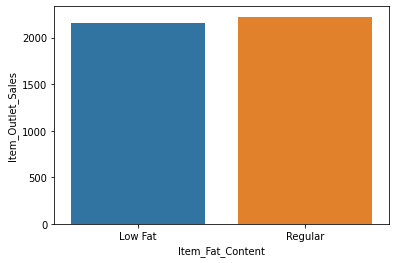

In [29]:
sns.barplot(fat.index,fat)

In [30]:
typ=data.groupby('Item_Type')['Item_Outlet_Sales'].mean()
typ

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

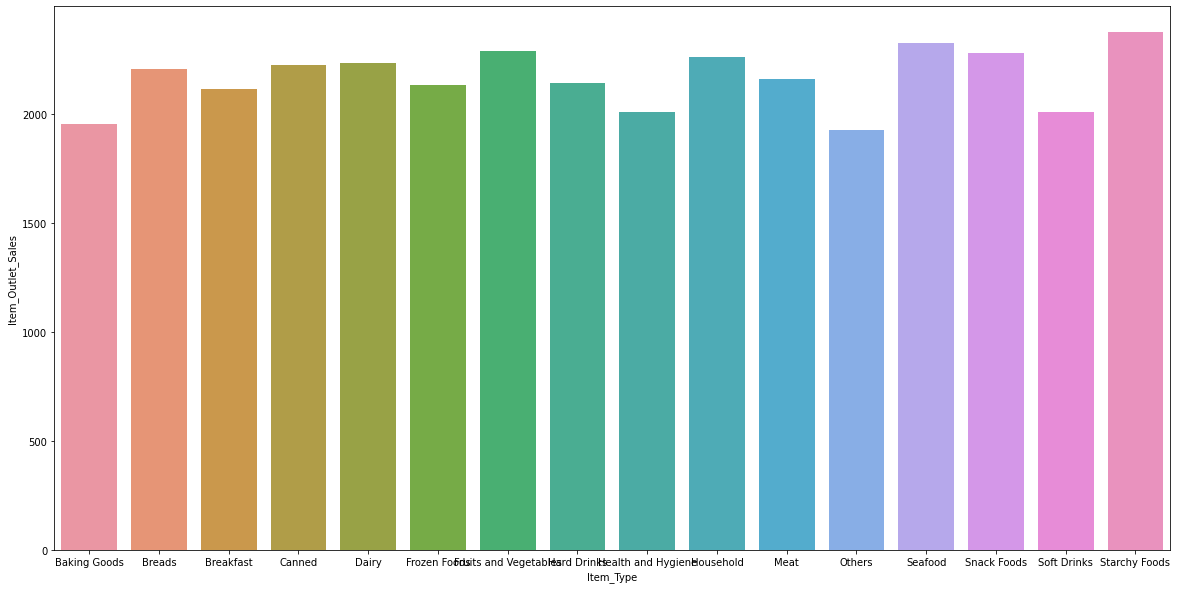

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(typ.index,typ)

# Missing Value Handling

In [32]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Index                           0
dtype: int64

There are missing values in dataset

In [33]:
data['Outlet_Size'].mode()[0]

'Medium'

In [34]:
data['Item_Weight'].mean()

12.792854228644284

In [35]:
data['Item_Outlet_Sales'].mean()

2181.288913575032

In [36]:
# missing values in item_weight is replaced by average of item_weight
data['Item_Weight'][data['Item_Weight'].isna()]=data['Item_Weight'].mean()

In [37]:
# missing values in outlet_size is replaced by mode of outlet_size
data['Outlet_Size'][data['Outlet_Size'].isna()]=data['Outlet_Size'].mode()[0]

In [38]:
# missing values in item_outlet_sales is replaced by average of item_outlet_sales
data['Item_Outlet_Sales'][data['Item_Outlet_Sales'].isna()]=data['Item_Outlet_Sales'].mean()

In [39]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Index                        0
dtype: int64

In [40]:
databackup=data.copy()
data=databackup.copy()

In [41]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Index                         object
dtype: object

In [42]:
#Dummy Variables: we will convert the categorical variables into numerical values using dummies
data = pd.get_dummies(data, columns =['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type'])
data.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Identifier                   object
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Index                               object
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_S

In [43]:
#Extract train and test from data
train=data.loc[data['Index']=='train']
test=data.loc[data['Index']=='test']

In [44]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Index,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,train,1,0,...,1,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,train,0,1,...,0,0,1,0,1,0,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,train,1,0,...,1,0,0,0,1,0,0,1,0,0
3,FDX07,19.20,0.065953,182.0950,OUT010,1998,732.3800,train,0,1,...,0,0,1,0,1,0,1,0,0,0
4,NCD19,8.93,0.065953,53.8614,OUT013,1987,994.7052,train,1,0,...,0,0,1,1,0,0,0,1,0,0


In [45]:
train.shape

(8523, 36)

In [46]:
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Index,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,FDW58,20.750000,0.007565,107.8622,OUT049,1999,2181.288914,test,1,0,...,1,0,0,0,1,0,0,1,0,0
8524,FDW14,8.300000,0.038428,87.3198,OUT017,2007,2181.288914,test,0,1,...,0,1,0,0,1,0,0,1,0,0
8525,NCN55,14.600000,0.099575,241.7538,OUT010,1998,2181.288914,test,1,0,...,0,0,1,0,1,0,1,0,0,0
8526,FDQ58,7.315000,0.015388,155.0340,OUT017,2007,2181.288914,test,1,0,...,0,1,0,0,1,0,0,1,0,0
8527,FDY38,12.792854,0.118599,234.2300,OUT027,1985,2181.288914,test,0,1,...,0,0,1,0,1,0,0,0,0,1


In [47]:
test.shape

(5681, 36)

In [48]:
train.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Identifier                   object
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Index                               object
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_S

In [49]:
test.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Identifier                   object
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Index                               object
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_S

In [50]:
test1=test.drop(['Index','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)

In [51]:
test1.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,20.750000,0.007565,107.8622,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
8524,8.300000,0.038428,87.3198,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
8525,14.600000,0.099575,241.7538,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
8526,7.315000,0.015388,155.0340,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8527,12.792854,0.118599,234.2300,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1


In [52]:
X=train.drop(['Index','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']

We split the train data into X,y for modelling

# MODELLING

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
X_train.shape,X_test.shape

((5710, 31), (2813, 31))

We split X,y into train set and test set.We keep 66% of data as training set and remaining 33% as test set.
Now our data is ready. Its time to build our model and check its performance. Linear Regression is used for Regression  problems and as it is a Regression problem.
let's first build a Linear Regression model.

In [54]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
ypred=reg.predict(X_test)

In [56]:
ypred

array([1334.63736161,  787.74860471,  856.41812967, ..., 3025.04481731,
       3236.8150462 ,  635.2734724 ])

# Testing Error

In [57]:
# Calculating testing error
from sklearn.metrics import mean_squared_error 
testing_error=mean_squared_error(ypred,y_test)
testing_error

1219699.804350804

In [58]:
# #Calculating RMSE
rmse_linear=np.sqrt(testing_error)

In [59]:
rmse_linear

1104.400201172928

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.5648166438642681

# Training Error

In [61]:
ypred_train=reg.predict(X_train)
training_error=mean_squared_error(ypred_train,y_train)
training_error

1303978.8530804042

We can infer that testing error is low and training error is high.There is no overfitting.

# Ridge Regressor

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alphaval = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]

ridge = Ridge()

parameters = {'alpha': alphaval}

ridge_regressor = GridSearchCV(ridge, parameters,cv=5)

ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
ridge_regressor.best_params_

{'alpha': 20}

In [64]:
ridge=Ridge(alpha=20)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)

In [65]:
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

1218988.0307707398

In [66]:
rmse_ridge=np.sqrt(Ridge_Error)
rmse_ridge

1104.077909737687

# Lasso Regressor

In [67]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]}


lasso_regressor = GridSearchCV(lasso, parameters)

lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [68]:
lasso_regressor.best_params_

{'alpha': 5}

In [69]:
lasso=Lasso(alpha=5)
lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)

In [70]:
lasso_Error=mean_squared_error(y_pred_lasso,y_test)

lasso_Error

1213275.7335381876

In [71]:
rmse_lasso=np.sqrt(lasso_Error)
rmse_lasso

1101.4879634104893

# ElasticNet

In [72]:
from sklearn.linear_model import ElasticNet

elastic= ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]}

elastic_regressor = GridSearchCV(elastic, parameters)

elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
elastic_regressor.best_params_

{'alpha': 0.01}

In [74]:
elastic=ElasticNet(alpha=0.01)
elastic.fit(X_train,y_train)
y_pred_elastic=elastic.predict(X_test)

In [75]:
elastic_Error=mean_squared_error(y_pred_elastic,y_test)
elastic_Error

1219445.412707826

In [76]:
rmse_elas=np.sqrt(elastic_Error)
rmse_elas

1104.2850233104793

# Random Forest Regressor

In [77]:
#importing Random Forest Regressor from sklearn.ensemble
from sklearn.model_selection import GridSearchCV #Parameter tunining
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
n_estimators=[25,50,75,100,125,150,175,200]#number of decision trees in the forest, default = 100
criterion=['mse']#Criteria for choosing nodes ,default=mse
max_depth=[3,5,10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth} #this will undergo 8*1*3 = 48 iterations
RFR_reg = GridSearchCV(reg, parameters)
RFR_reg.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [78]:
 #To get the best parameter
RFR_reg.best_params_

{'criterion': 'mse', 'max_depth': 5, 'n_estimators': 175}

In [103]:
Reg=RandomForestRegressor(n_estimators=175,criterion='mse',max_depth=5)

In [104]:
Reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=175, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [105]:
y_pred_reg=Reg.predict(X_test)

In [106]:
y_pred_reg

array([1188.92507078,  700.81634578,  700.81634578, ..., 2944.64888273,
       3224.60891338,  861.18583834])

In [107]:
from sklearn.metrics import mean_squared_error
random_forest_error=mean_squared_error(y_pred_reg,y_test)
random_forest_error


1117750.523845437

In [108]:
rmse_rf=np.sqrt(random_forest_error)
rmse_rf

1057.237212665841

In [109]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_reg)

0.6011916845814086

# XG Boost

In [86]:
from xgboost import XGBRegressor

In [87]:
from sklearn.model_selection import GridSearchCV 
xgb=XGBRegressor()
n_estimators=[25,50,75,100,125,150,175,200]
gamma=[0.01,0.05,1]
max_depth=[3,5,10] 
learning_rate=[0.5,0.75,1]
parameters={'n_estimators': n_estimators,'gamma':gamma,'max_depth':max_depth,'learning_rate':learning_rate} 
xgb_reg = GridSearchCV(xgb, parameters)
xgb_reg.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=None,
             param_gri

In [88]:
xgb_reg.best_params_

{'gamma': 0.01, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 25}

In [89]:
reg=XGBRegressor(n_estimators=25,gamma=0.01,max_depth=3,learning_rate=0.5)

In [90]:
reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=25, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [91]:
y_pred_reg=reg.predict(X_test)

In [92]:
y_pred_reg

array([1077.9237,  853.7345,  732.3609, ..., 2843.0378, 3347.741 ,
        897.8924], dtype=float32)

In [93]:
from sklearn.metrics import mean_squared_error
xgboost_error=mean_squared_error(y_pred_reg,y_test)
xgboost_error

1193023.107326675

In [94]:
rmse_xg=np.sqrt(xgboost_error)
rmse_xg

1092.2559715225525

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_reg)

0.574334768324209

In [96]:
RMSEDict={'ElasticNet':rmse_elas,'LassoReg':rmse_lasso,'RidgeReg':rmse_ridge,'LinearReg':rmse_linear,'RandomForest':rmse_rf,'XGBoost':rmse_xg}

In [97]:
RMSEDict

{'ElasticNet': 1104.2850233104793,
 'LassoReg': 1101.4879634104893,
 'RidgeReg': 1104.077909737687,
 'LinearReg': 1104.400201172928,
 'RandomForest': 1056.673741405275,
 'XGBoost': 1092.2559715225525}

After evaluating rmse,we can say that RandomForestRegressor is best fit for dataset given

In [98]:
predictions=Reg.predict(test1)

In [99]:
submission=pd.DataFrame({'Item_Identifier':test['Item_Identifier'],'Outlet_Identifier':test['Outlet_Identifier'],'Item_Outlet_Sales':predictions},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [100]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1575.520001
8524,FDW14,OUT017,1399.292751
8525,NCN55,OUT010,555.887981
8526,FDQ58,OUT017,2499.262416
8527,FDY38,OUT027,6274.604622
...,...,...,...
14199,FDB58,OUT046,2087.757861
14200,FDD47,OUT018,2741.832682
14201,NCO17,OUT045,2033.497617
14202,FDJ26,OUT017,3560.084150


In [101]:
submission.to_csv('random_forest.csv',index=False)

Finally, we will save these predictions into a csv file